# Naive Bayes 분류기를 이용한 스팸 메일 분류기

## 1. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
# Null 값을 가진 샘플이 있는지 확인
df.isnull().values.any()

False

In [6]:
# 데이터 중복이 있는지 확인
df['v2'].nunique()

5169

In [7]:
# 데이터 중복 제거
df = df.drop_duplicates('v2', keep='first')

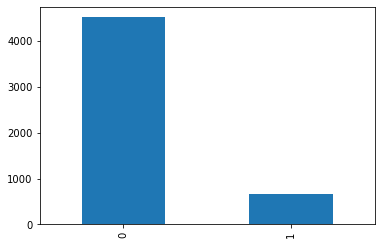

In [8]:
df['v1'].value_counts().plot(kind='bar')

In [11]:
df.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [12]:
X_data = df['v2']
y_data = df['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


## 2. Naive Bayes 분류기 적용

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB  # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score     # 정확도 계산

In [14]:
# 테스트용 데이터 20% 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=.2, random_state=2020)

In [15]:
# 훈련 데이터를 BoW로 만들어줌
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(4135, 7658)


In [16]:
model = MultinomialNB()
model.fit(X_train_dtm, y_train)
# alpha=1.0은 라플라스 스무딩이 적용되었음을 의미

MultinomialNB()

In [17]:
X_test_dtm = dtmvector.transform(X_test) # 테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(1034, 7658)


In [18]:
predicted = model.predict(X_test_dtm) # 테스트 데이터에 대한 예측
print("정확도: %.4f" % accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.9758


### TF-IDF 적용한 경우

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
# Term Frequency - Inverse Document Frequency 적용
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(X_train_dtm.shape)

(4135, 7658)


In [21]:
model.fit(tfidfv, y_train)

MultinomialNB()

In [22]:
tfidfv_test = tfidf_transformer.fit_transform(X_test_dtm)
predicted = model.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도: %.4f" % accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.9487
